In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
pd.set_option("display.max_rows", 500, "display.max_columns", 500)

In [18]:
import tensorflow as tf
import itertools
from tensorflow import keras
from keras.models import Sequential, save_model, load_model
from keras.layers import LeakyReLU
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [19]:
def display_data(filename):
    dataframe = pd.read_csv(filename, sep=";", low_memory=False)
    dataframe.dropna()
    return dataframe

data = display_data('data.csv')
data

,jobtitle,jobfield,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q64,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89,q90,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100,q101,q102,q103,q104,q105,q106,q107,q108,q109,q110,q111,q112,q113,q114,q115,q116,q117,q118,q119,q120,q121,q122,q123,q124,q125,q126,q127,q128,q129,q130,q131,q132,q133,q134,q135,q136,q137,q138,q139,q140,q141,q142,scale_e,scale_i,scale_s,scale_n,scale_t,scale_f,scale_j,scale_p,psychotype,satisfied
0,NaN,NaN,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,5,26,25,12,24,8,27,10,ISTJ,0
1,HR manager,Staff and training,1,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,16,22,17,16,23,11,22,15,ISTJ,1
2,HR manager,Staff and training,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,1,28,6,14,18,20,16,20,15,ENTJ,0
3,HR manager,Staff and training,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,28,10,22,10,16,14,22,12,ESTJ,1
4,HR manager,Staff and training,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,24,10,16,17,13,23,31,3,ENFJ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21841,NaN,NaN,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,25,15,17,20,13,13,19,15,ENTJ,0
21842,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,26,6,20,18,11,21,22,11,ESFJ,0
21843,NaN,NaN,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,1,0,1,0,1,16,21,22,1

In [20]:
new_df = data.copy()

temp_cols = new_df.columns
new_df = new_df[temp_cols[2:152]]
new_df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q64,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89,q90,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100,q101,q102,q103,q104,q105,q106,q107,q108,q109,q110,q111,q112,q113,q114,q115,q116,q117,q118,q119,q120,q121,q122,q123,q124,q125,q126,q127,q128,q129,q130,q131,q132,q133,q134,q135,q136,q137,q138,q139,q140,q141,q142,scale_e,scale_i,scale_s,scale_n,scale_t,scale_f,scale_j,scale_p
0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,5,26,25,12,24,8,27,10
1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,16,22,17,16,23,11,22,15
2,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,1,28,6,14,18,20,16,20,15
3,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,28,10,22,10,16,14,22,12
4,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,24,10,16,17,13,23,31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21841,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,25,15,17,20,13,13,19,15
21842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,26,6,20,18,11,21,22,11
21843,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,1,0,1,0,1,16,21,22,11,28,5,25,9
21844,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,

In [21]:
# finding out correlation between questions and scales
corr = new_df.corr()
corr = corr - np.diag(np.diag(corr))
temp = corr.columns[142:]
corr = corr[temp]
corr = corr[:142]
corr

,scale_e,scale_i,scale_s,scale_n,scale_t,scale_f,scale_j,scale_p
q1,-0.618409,0.624565,0.025095,-0.014608,0.020515,-0.069581,0.003401,-0.010473
q2,-0.123642,0.103400,-0.201713,0.259909,-0.010449,0.015139,-0.004100,0.009845
q3,0.000926,0.049045,0.130067,-0.182396,0.408807,-0.437776,0.202369,-0.235964
q4,-0.019680,-0.000106,-0.178227,0.205682,-0.105473,0.117795,-0.521517,0.518936
q5,-0.335386,0.359617,-0.095080,0.131887,-0.006336,0.014218,-0.090978,0.089652
q6,-0.014314,0.061048,0.408574,-0.483980,0.247350,-0.245756,0.255626,-0.268136
q7,-0.030760,0.050373,0.142912,-0.179310,0.416661,-0.367265,0.132723,-0.145540
q8,-0.015529,-0.005918,-0.197469,0.238883,-0.106515,0.125199,-0.528298,0.484225
q9,-0.518473,0.516225,-0.007936,0.010028,-0.049302,0.031095,-0.076923,0.063883
q10,-0.015603,-0.026374,-0.463508,0.486937,-0.256349,0.284061,-0.346234,0.339993


In [22]:
# storing scale labels
scales = temp_cols[144:152]
scales

Index(['scale_e', 'scale_i', 'scale_s', 'scale_n', 'scale_t', 'scale_f',
       'scale_j', 'scale_p'],
      dtype='object')

In [23]:
# finding out maximum and minimum scale correlated to each question
min_max_dict = dict()

for index, row in corr.iterrows():
    min = 999999
    max = -999999
    temp_max = ''
    temp_min = ''
    for scale in scales:
        if row[scale] > max:
            max = row[scale]
            temp_max = scale
        if row[scale] < min:
            min = row[scale]
            temp_min = scale
    min_max_dict[index] = ((temp_min, temp_max), (min, max))

min_max_dict

{'q1': (('scale_e', 'scale_i'), (-0.618409156012988, 0.624564795725752)),
 'q2': (('scale_s', 'scale_n'), (-0.20171295231812594, 0.259908948975465)),
 'q3': (('scale_f', 'scale_t'), (-0.4377761957468252, 0.40880716636520187)),
 'q4': (('scale_j', 'scale_p'), (-0.5215167030741805, 0.51893563861842)),
 'q5': (('scale_e', 'scale_i'), (-0.33538550213343105, 0.3596165953747356)),
 'q6': (('scale_n', 'scale_s'), (-0.48397992966039877, 0.4085743030737839)),
 'q7': (('scale_f', 'scale_t'), (-0.36726544139675554, 0.4166606911039186)),
 'q8': (('scale_j', 'scale_p'), (-0.5282977601609866, 0.4842252109963812)),
 'q9': (('scale_e', 'scale_i'), (-0.5184729186969894, 0.5162254875925859)),
 'q10': (('scale_s', 'scale_n'), (-0.4635077839285722, 0.4869368290344239)),
 'q11': (('scale_f', 'scale_t'), (-0.5768256942996584, 0.5638284958904426)),
 'q12': (('scale_p', 'scale_j'), (-0.35125906957262415, 0.33707144105786346)),
 'q13': (('scale_i', 'scale_e'), (-0.21623462407406038, 0.26911261206444176)),
 'q1

In [24]:
pairs = [('scale_e', 'scale_i'), ('scale_s', 'scale_n') , ('scale_t', 'scale_f'), ('scale_j', 'scale_p')]

dichotomous = 0
cumulative  = 0
dichotomous_list = []
cumulative_list  = []
for key in min_max_dict:
    for pair in pairs:
        if (min_max_dict[key][0] == pair) or (min_max_dict[key][0] == pair[::-1]):
            dichotomous += 1
            dichotomous_list.append(key)
            break
        
cumulative = 142 - len(dichotomous_list)
for key in min_max_dict:
    if key not in dichotomous_list:
        cumulative_list.append(key)

print('dichotomous questions =', dichotomous_list)
print('no. of dichotomous questions =', dichotomous)
print('cumulative questions =', cumulative_list)
print('no. of cumulative questions =', cumulative)

dichotomous questions = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38', 'q39', 'q40', 'q41', 'q42', 'q43', 'q44', 'q45', 'q46', 'q47', 'q48', 'q49', 'q50', 'q51', 'q52', 'q53', 'q55', 'q57', 'q58', 'q59', 'q60', 'q61', 'q62', 'q63', 'q65', 'q66', 'q67', 'q68', 'q69', 'q70', 'q72', 'q73', 'q76', 'q77', 'q78', 'q79', 'q80', 'q81', 'q83', 'q84', 'q85', 'q86', 'q87', 'q88', 'q89', 'q90', 'q91', 'q92', 'q93', 'q94', 'q95', 'q96', 'q97', 'q99', 'q101', 'q103', 'q105', 'q106', 'q107', 'q109', 'q111', 'q113', 'q115', 'q116', 'q117', 'q121', 'q123', 'q124', 'q125', 'q126', 'q127', 'q130', 'q131', 'q132', 'q133', 'q134', 'q135', 'q136', 'q138', 'q139', 'q140', 'q142']
no. of dichotomous questions = 119
cumulative questions = ['q54', 'q56', 'q64', 'q71', 'q74', 'q75', 'q82', 'q98', 'q100', 

In [25]:
# manipulating dataframe
cols = data.columns
data = data[cols[2:153]]
data

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q64,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89,q90,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100,q101,q102,q103,q104,q105,q106,q107,q108,q109,q110,q111,q112,q113,q114,q115,q116,q117,q118,q119,q120,q121,q122,q123,q124,q125,q126,q127,q128,q129,q130,q131,q132,q133,q134,q135,q136,q137,q138,q139,q140,q141,q142,scale_e,scale_i,scale_s,scale_n,scale_t,scale_f,scale_j,scale_p,psychotype
0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,5,26,25,12,24,8,27,10,ISTJ
1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,16,22,17,16,23,11,22,15,ISTJ
2,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,1,28,6,14,18,20,16,20,15,ENTJ
3,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,28,10,22,10,16,14,22,12,ESTJ
4,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,24,10,16,17,13,23,31,3,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21841,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,0,25,15,17,20,13,13,19,15,ENTJ
21842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,26,6,20,18,11,21,22,11,ESFJ
21843,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,1,0,1,0,1,16,21,22,11,28,5,25,9,ISTJ
21844,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0

In [26]:
# splitting data into attributes and classes
X = data[cols[2:144]].to_numpy()
X_temp = data[dichotomous_list].to_numpy()
y = data['psychotype'].to_numpy()

In [27]:
# storing class names
class_names = data['psychotype'].unique()

In [28]:
# Encoding categorical data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [29]:
def split_dataset(X, y, ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=50, shuffle = True)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_dataset(X, y, 0.3)
X_train_1, X_test_1, y_train_1, y_test_1 = split_dataset(X_temp, y, 0.3)

In [30]:
def build_NN(inp, out, act):
    #Initialising the ANN
    model = Sequential()
    
    # Adding the input layer
    model.add(Dense(32, input_dim = inp))
    model.add(LeakyReLU(0.2))

    # Adding the first hidden layer
    model.add(Dense(64))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    # Adding the second hidden layer
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    # Adding the output layer
    model.add(Dense(out, activation = act))

    return model

MLP_exp = build_NN(X_train_1.shape[1], y_train_1.shape[1], "softmax")
MLP_exp.summary()

MLP = build_NN(X_train.shape[1], y_train.shape[1], "softmax")
MLP.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                3840      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128)              

In [31]:
def compiling_model(model):
    model.compile(optimizer=Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"), loss = 'categorical_crossentropy', metrics = ['accuracy'])

compiling_model(MLP_exp)
compiling_model(MLP)


In [32]:
history_1 = MLP_exp.fit(X_train_1, y_train_1, batch_size = 256, epochs = 250, validation_data=(X_test_1, y_test_1))

Epoch 1/250
60/60 [==============================] - 1s 5ms/step - loss: 2.1144 - accuracy: 0.3289 - val_loss: 1.5423 - val_accuracy: 0.4803
Epoch 2/250
60/60 [==============================] - 0s 2ms/step - loss: 1.3231 - accuracy: 0.5382 - val_loss: 0.9068 - val_accuracy: 0.6776
Epoch 3/250
60/60 [==============================] - 0s 2ms/step - loss: 0.9248 - accuracy: 0.6559 - val_loss: 0.6450 - val_accuracy: 0.7634
Epoch 4/250
60/60 [==============================] - 0s 2ms/step - loss: 0.7342 - accuracy: 0.7180 - val_loss: 0.5314 - val_accuracy: 0.8065
Epoch 5/250
60/60 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7561 - val_loss: 0.4656 - val_accuracy: 0.8193
Epoch 6/250
60/60 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7717 - val_loss: 0.4249 - val_accuracy: 0.8345
Epoch 7/250
60/60 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7929 - val_loss: 0.4011 - val_accuracy: 0.8424
Epoch 8/250
6

In [33]:
# Fitting the ANN to the Training set
history = MLP.fit(X_train, y_train, batch_size = 256, epochs = 250, validation_data=(X_test, y_test))

Epoch 1/250
60/60 [==============================] - 1s 5ms/step - loss: 2.1425 - accuracy: 0.3324 - val_loss: 1.5676 - val_accuracy: 0.4760
Epoch 2/250
60/60 [==============================] - 0s 3ms/step - loss: 1.3532 - accuracy: 0.5369 - val_loss: 0.9720 - val_accuracy: 0.6556
Epoch 3/250
60/60 [==============================] - 0s 3ms/step - loss: 0.9612 - accuracy: 0.6475 - val_loss: 0.6655 - val_accuracy: 0.7678
Epoch 4/250
60/60 [==============================] - ETA: 0s - loss: 0.7680 - accuracy: 0.70 - 0s 3ms/step - loss: 0.7402 - accuracy: 0.7195 - val_loss: 0.5102 - val_accuracy: 0.8174
Epoch 5/250
60/60 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7635 - val_loss: 0.4337 - val_accuracy: 0.8419
Epoch 6/250
60/60 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7900 - val_loss: 0.3655 - val_accuracy: 0.8685
Epoch 7/250
60/60 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.8109 - val_loss: 0

In [34]:
def save_model(model, model_name):
    model.save(model_name)

# save_model(MLP, "Model_1.h5")

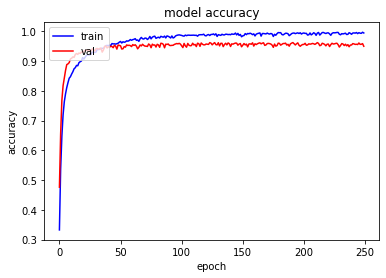

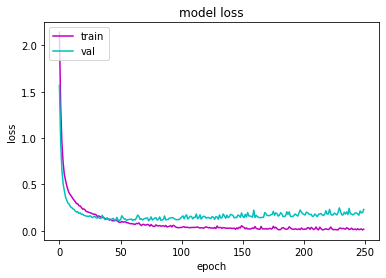

In [35]:
def plot_graphs(history):
    
    plt.plot(history.history['accuracy'], c= 'b')
    plt.plot(history.history['val_accuracy'], c='r')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

    plt.plot(history.history['loss'], c='m')
    plt.plot(history.history['val_loss'], c='c')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc = 'upper left')

    plt.show()

plot_graphs(history)

In [36]:
# Predicting the Test set results
y_predict = MLP.predict(X_test)

In [37]:
print(classification_report(y_test.argmax(axis=1), y_predict.argmax(axis=1), target_names=class_names))

              precision    recall  f1-score   support

        ISTJ       0.95      0.87      0.91       235
        ENTJ       0.95      0.97      0.96       344
        ESTJ       0.94      0.96      0.95       508
        ENFJ       0.96      0.96      0.96       383
        ESTP       0.95      0.94      0.94       483
        ESFJ       0.92      0.90      0.91       122
        INTJ       0.96      0.99      0.98      1929
        INFJ       0.95      0.95      0.95       349
        ISFP       0.97      0.82      0.89       112
        ENFP       0.95      0.80      0.87       155
        ENTP       0.92      0.94      0.93       250
        INFP       0.90      0.93      0.92       211
        ISFJ       0.95      0.87      0.91       219
        ESFP       0.87      0.81      0.84        77
        ISTP       0.96      0.96      0.96       990
        INTP       0.90      0.93      0.91       187

    accuracy                           0.95      6554
   macro avg       0.94   

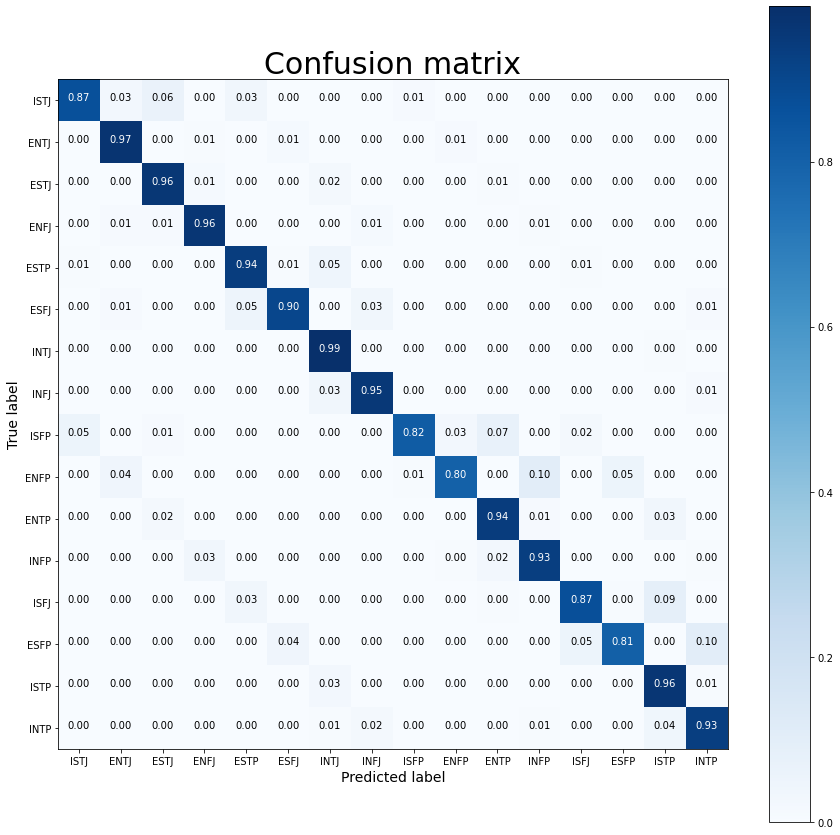

In [38]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black", fontsize = 10)

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    # plt.savefig('Confusion_matrix.jpg')

cm = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
plot_confusion_matrix(cm, class_names)

In [39]:
y_predict_labels = label_encoder.inverse_transform(np.argmax(y_predict, axis=1))
y_predict_labels

array(['ISTJ', 'ENTP', 'ISTJ', ..., 'ESTP', 'ENFP', 'ENTP'], dtype=object)